In [1]:
from rsciio import edax
import os
import hyperspy.api as hs 
import hyperspy
print(f"hyperspy version: {hyperspy.__version__}")

datadir = os.environ.get("EXTRACTACOMPDATADIR")
def load_edax_spd(basename: str):
    subdir = os.path.join(datadir, basename, "Proprietary EDAX Files")    
    fispd = os.path.join(subdir, f"{basename}.spd")
    fiipr = os.path.join(subdir, f"{basename}.ipr")

    return hs.load(fispd, ipr_fname=fiipr)  

hyperspy version: 2.4.0


In [2]:
from dask.distributed import Client
c = Client(n_workers=1, threads_per_worker = 1)
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 1,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50233,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:50238,Total threads: 1
Dashboard: http://127.0.0.1:50239/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:50236,


In [3]:
ds=load_edax_spd('C-12')

/Users/chavlin/src/extractacomp_/extractacomp_exploration/.venv/lib/python3.13/site-packages/hyperspy/misc/_utils.py:1590: VisibleDeprecationWarning: Importing `LazyComplexSignal1D` from `hyperspy._signals.complex_signal1d` is deprecated and will be removed in the HyperSpy 3.0 release. Import it from `hyperspy.signals` instead.
  warnings.warn(
/Users/chavlin/src/extractacomp_/extractacomp_exploration/.venv/lib/python3.13/site-packages/hyperspy/misc/_utils.py:1590: VisibleDeprecationWarning: Importing `LazySignal1D` from `hyperspy._signals.signal1d` is deprecated and will be removed in the HyperSpy 3.0 release. Import it from `hyperspy.signals` instead.
  warnings.warn(
/Users/chavlin/src/extractacomp_/extractacomp_exploration/.venv/lib/python3.13/site-packages/hyperspy/misc/_utils.py:1590: VisibleDeprecationWarning: Importing `LazySignal1D` from `hyperspy._signals.signal1d` is deprecated and will be removed in the HyperSpy 3.0 release. Import it from `hyperspy.signals` instead.
  warn

In [4]:
lazy_sig = ds.as_lazy()
lazy_sig

<LazyEDSSEMSpectrum, title: EDS Spectrum Image, dimensions: (1024, 800|3000)>

In [7]:
get_sum = lazy_sig.sum()

In [8]:
get_sum

<LazyEDSSEMSpectrum, title: EDS Spectrum Image, dimensions: (|3000)>

In [9]:
result = get_sum.compute()

/Users/chavlin/src/extractacomp_/extractacomp_exploration/.venv/lib/python3.13/site-packages/distributed/client.py:3375: UserWarning: Sending large graph of size 2.29 GiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


well. that doesn't look great: likely because it's a binary blob, but seems to transmit the entire array so that even though each process operates on a chunk it still needs the full array.... 

here's the memory use

![](dask_mem_use.png)

In [12]:
type(get_sum)

exspy.signals.eds_sem.EDSSEMSpectrum

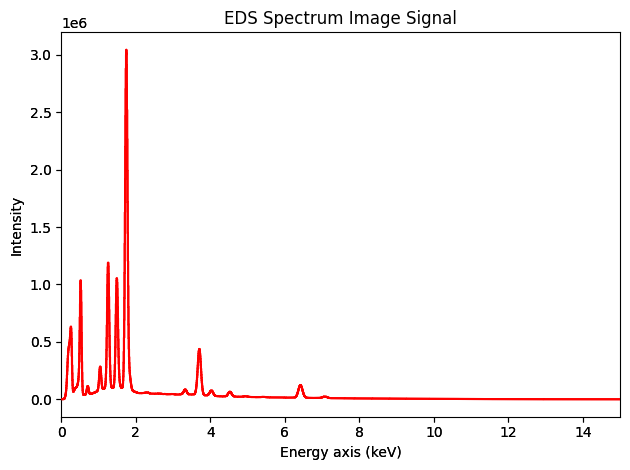

In [13]:
get_sum.plot()